In [44]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import math
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(42)

In [32]:
id_nums = ["ID" + str(f"{x:03}") for x in range(1, 801)]
number = [random.randint(1,3) for x in range(1, 801)]
letter = ["A" if x == 1 else "B" if x == 2 else "C" for x in number]
feature_one = [np.random.default_rng().normal(2500, 300) for x in range(1, 801)]
feature_two = [np.random.default_rng().normal(400, 15) for x in range(1, 801)]
feature_three = [np.random.default_rng().normal(3*feature_one[x] - 5*feature_two[x], 12) if letter[x] == "A" else np.random.default_rng().normal(2*feature_one[x], 12) if letter[x] == "B" else np.random.default_rng().normal(feature_two[x] - feature_one[x], 12) for x in range(0, 800)]
df = pd.DataFrame()
df["ID"] = id_nums
df["Group"] = letter
df["Feature_1"] = feature_one
df["Feature_2"] = feature_two
df["Feature_3"] = feature_three
df

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID001,A,2912.232797,390.353276,6783.558026
1,ID002,A,2694.167168,386.676713,6136.095633
2,ID003,C,2598.529779,382.541555,-2222.868005
3,ID004,C,2942.651404,415.911653,-2517.362202
4,ID005,B,2402.772249,398.394268,4800.153848
...,...,...,...,...,...
795,ID796,C,2801.609941,396.113947,-2408.077607
796,ID797,B,2648.157633,401.818329,5306.636770
797,ID798,B,2018.908569,396.961664,4036.542423
798,ID799,A,2078.712751,407.314575,4191.883130


In [41]:
#2a
(1 - norm.cdf(3000, 2500, 300)) * 800

38.23228181825176

In [42]:
#2b
greater = df["Feature_1"] >= 3000
sum(greater)

41

In [43]:
#2c
df.groupby('Group')['Feature_3'].agg(['mean', 'std'])

,mean,std
Group,,
A,5563.671998,877.007988
B,5022.263422,629.980162
C,-2103.757434,289.379779


Text(0, 0.5, 'Feature_3')

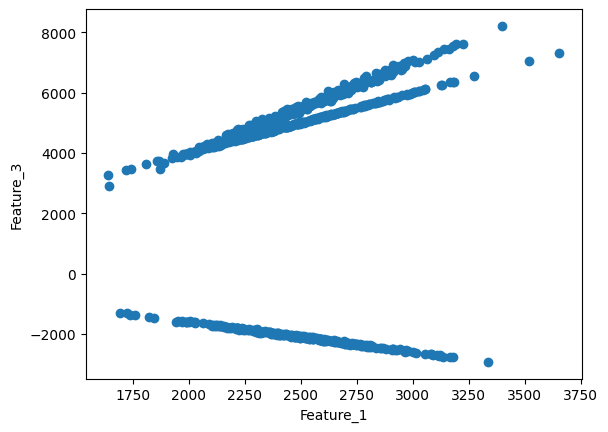

In [46]:
#3
plt.scatter(df['Feature_1'], df['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')

In [47]:
#4
df.to_csv('fake_data.csv', index=False)